In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("cleaned_preprocessed_dataset.csv")
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0


In [3]:
# Convert date columns
df["bookingenddatetime_(month_/_day_/_year)_apr_may"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_apr_may"], errors="coerce"
)

df["bookingenddatetime_(month_/_day_/_year)_june"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_june"], errors="coerce"
)

# Unified booking date
df["booking_date"] = df[
    "bookingenddatetime_(month_/_day_/_year)_apr_may"
].combine_first(
    df["bookingenddatetime_(month_/_day_/_year)_june"]
)

# Unified numeric columns
df["number_booked"] = df["number_booked_apr_may"].combine_first(
    df["number_booked_june"]
)
df["maxbookees"] = df["maxbookees_apr_may"].combine_first(
    df["maxbookees_june"]
)
df["price"] = df["price_(inr)_apr_may"].combine_first(
    df["price_(inr)_june"]
)

# Attendance ratio
df["attendance_ratio"] = df["number_booked"] / df["maxbookees"]

df = df.dropna(subset=["booking_date", "number_booked", "price"])
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june,booking_date,number_booked,maxbookees,price,attendance_ratio
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-03,1.528272,0.239673,-1.731935,6.376480
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0,2018-04-03,1.528272,0.239673,-1.731935,6.376480
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0,2018-04-03,1.528272,0.239673,-1.731935,6.376480
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0,2018-04-03,1.528272,0.239673,-1.731935,6.376480
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-10,0.891390,0.239673,-1.731935,3.719189


In [4]:
class_demand = (
    df.groupby("activitydescription")
    .agg(
        total_bookings=("number_booked", "sum"),
        avg_attendance=("attendance_ratio", "mean"),
        avg_price=("price", "mean")
    )
    .sort_values("total_bookings", ascending=False)
)

class_demand.head(10)


,total_bookings,avg_attendance,avg_price
activitydescription,,,
Body Combat 7.00-8.00pm,198.841717,4.423889,-0.473551
Line Dance 10.45-11.45am,136.963196,1.442248,-0.473551
Body Con 9.00-10.00am,111.000000,0.792857,1299.000000
Studio Cyc 9.05 -9.55am,98.000000,0.907407,1999.000000
Pilates 9.30-10.30am,94.348494,-1.199579,1.414025
Zumba Gold 12.45-1.45pm,91.956903,1.308113,0.155641
Yoga 10.30-11.30am,90.527205,-1.150994,0.155641
Body Con 10.30-11.30am,90.147273,1.619160,-0.725228
Pilates 1.45-2.45pm,89.487704,1.274671,1.414025


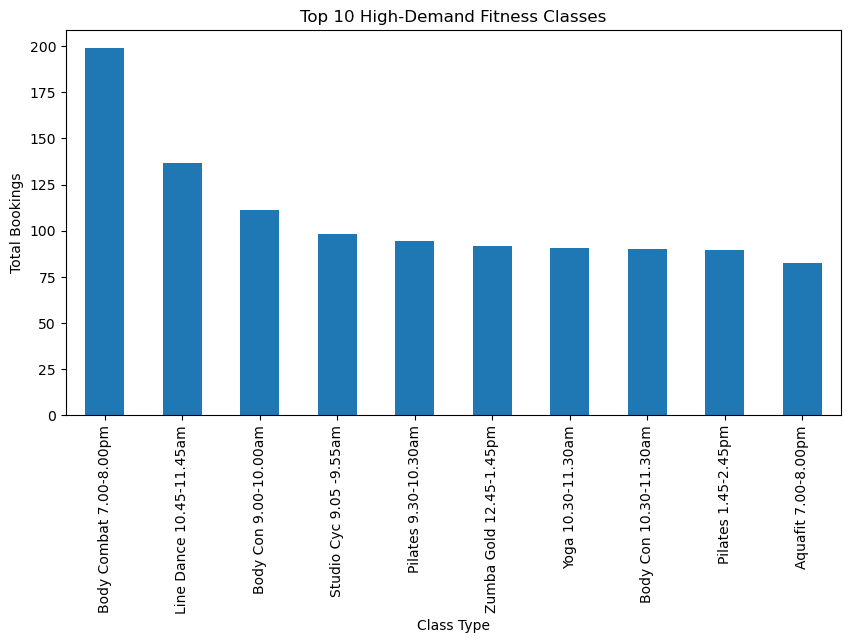

In [5]:
plt.figure(figsize=(10,5))
class_demand["total_bookings"].head(10).plot(kind="bar")
plt.title("Top 10 High-Demand Fitness Classes")
plt.xlabel("Class Type")
plt.ylabel("Total Bookings")
plt.show()


In [6]:
df["day_of_week"] = df["booking_date"].dt.day_name()

day_demand = (
    df.groupby("day_of_week")["number_booked"]
    .sum()
    .reindex([
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ])
)

day_demand


day_of_week
Monday        26.825232
Tuesday      664.287041
Wednesday    -97.851131
Thursday    -187.569581
Friday      -376.945643
Saturday     339.781132
Sunday       276.472951
Name: number_booked, dtype: float64

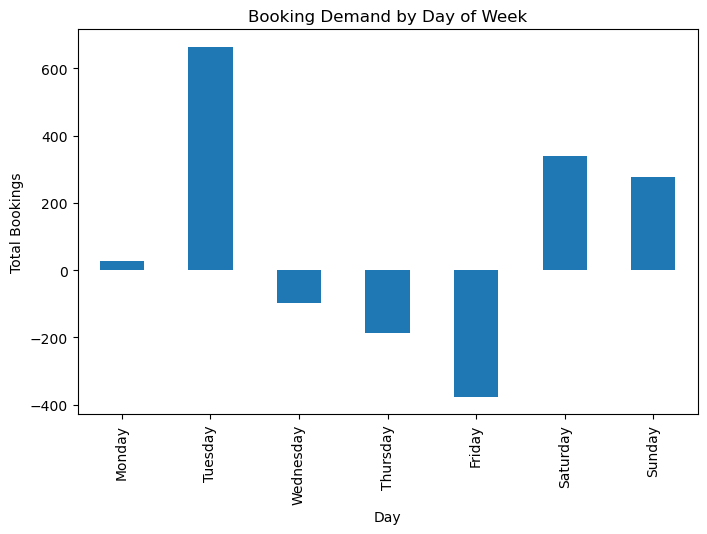

In [7]:
plt.figure(figsize=(8,5))
day_demand.plot(kind="bar")
plt.title("Booking Demand by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Bookings")
plt.show()


In [8]:
corr_features = df[["price", "number_booked", "attendance_ratio"]]

corr_features.corr()


,price,number_booked,attendance_ratio
price,1.000000,0.474882,-0.013624
number_booked,0.474882,1.000000,0.160345
attendance_ratio,-0.013624,0.160345,1.000000


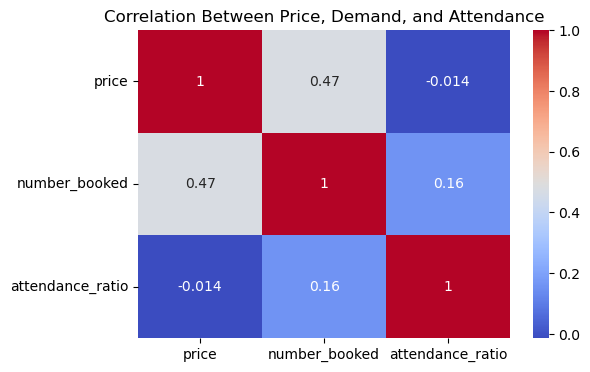

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_features.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Price, Demand, and Attendance")
plt.show()
